# SQL Join mit 2 Tabellen

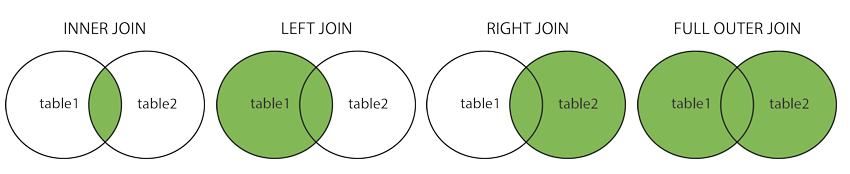  

Ausgangspunkt 2 Tabellen:

- \[Sales\].\[SalesOrderHeader\] 
- \[Sales\].\[Customer\]

In [ ]:
USE [AdventureWorks2017]
GO
Select * from [Sales].[SalesOrderHeader] 
Select * from [Sales].[Customer]

**<u>Aufgabe 1:</u>** Verbinde die 2 Tabellen, sodass für jeden Kunden alle Bestellungen aufgelistet werden.  <mark>INNER JOIN</mark>  
Listet jetzt alle Kunden mit deren Bestellungen auf. Kunden, die keine Bestellungen haben, werden nicht angezeigt. Bestellungen, die keinem gültigen Kunden zugeordent werden auch nicht dargestellt.

In [ ]:
Select * from [Sales].[Customer] as c
inner join [Sales].[SalesOrderHeader] as soh
on soh.CustomerID = c.CustomerID

**<u>Aufgabe 2:</u>** Liste alle Kunden und deren Bestellungen. Es sollen aber auch die Kunden angezeigt werden, die keine Bestellungen haben. <mark>LEFT (OUTER) JOIN</mark>

In [ ]:
Select * from [Sales].[Customer] as c
left outer join [Sales].[SalesOrderHeader] as soh
on soh.CustomerID = c.CustomerID

Select * from [Sales].[Customer] as c
left join [Sales].[SalesOrderHeader] as soh
on soh.CustomerID = c.CustomerID

**<u>Aufgabe 3:</u>** Liste alle Kunden auf, die keine Bestellung haben <mark>LEFT OUTER JOIN WHERE IS NULL</mark>

In [ ]:
Select c.* from [Sales].[Customer] as c
left outer join [Sales].[SalesOrderHeader] as soh
on soh.CustomerID = c.CustomerID
where soh.SalesOrderID is null

**<u>Aufgabe 4:</u>** Zeige Alle Bestellungen inklusive Kunden, auch diejenigen, die keinen gültigen Kunden haben. <mark>RIGHT (OUTER) JOIN</mark>

In [ ]:
Select * from [Sales].[Customer] as c
right outer join [Sales].[SalesOrderHeader] as soh
on soh.CustomerID = c.CustomerID

In [ ]:
-- das entspricht einem Left outer joint mit vertauschten Tabellen
Select * from [Sales].[SalesOrderHeader] as soh
left outer join [Sales].[Customer] as c
on soh.CustomerID = c.CustomerID


Dass der right outer join nichts anderes ist als ein left outer join zeigt sich bei der Ansicht der Execution Pläne (Bei SQL 2016,2017,2019 wird wirklich ein right outer join statt left outer join gemacht; bei 2014 verhält es sich aber so)

![left-join-execution-plan](https://sqlhints.com/wp-content/uploads/2016/10/LEFT-JOIN-Execution-Plan.jpg)  

![right-join-execution-plan](https://sqlhints.com/wp-content/uploads/2016/10/RIGHT-JOIN-Execution-Plan.jpg)

**<u>Aufgabe 5:</u>** Welche Bestellungen haben keinen gültigen Kunden <span style="background-color: rgb(255, 255, 0); color: rgb(0, 0, 0);">RIGHT OUTER JOIN WHERE IS NULL</span>

In [ ]:
Select * from [Sales].[Customer] as c
right outer join [Sales].[SalesOrderHeader] as soh
on soh.CustomerID = c.CustomerID
Where c.CustomerID is null

In [ ]:
-- das entspricht einem Left outer joint mit vertauschten Tabellen
Select * from [Sales].[SalesOrderHeader] as soh
left outer join [Sales].[Customer] as c
on soh.CustomerID = c.CustomerID
Where c.CustomerID is null

## FULL OUTER JOIN 

... schließt sowohl die rechte als auch die linke Tabelle ein

![Beispiel für vollständige äußere Verknüpfung.](https://docs.microsoft.com/de-de/power-query/images/full-outer-join-operation.png)

In [ ]:
--Vorbereitung
USE MASTER 
GO
DROP DATABASE if exists TEST_FULL_JOIN
GO
CREATE DATABASE [TEST_FULL_JOIN]
GO
USE [TEST_FULL_JOIN]
GO
CREATE TABLE [LeftTable] ([Date] date, CountryID int, Units int)
CREATE TABLE [RightTable] (ID int, Country nvarchar(100))
GO
INSERT INTO [LeftTable] ([Date],CountryID, Units)
Values('2020-1-1',1,40),('2020-1-2',1,25),('2020-1-3',3,30),('2020-1-4',2,35)
GO
INSERT INTO [RightTable] (ID,Country)
Values(1,'USA'),(2,'Canada'),(3,'Panama'),(4,'Spain')
GO
Select * from [LeftTable]
Select * from [RightTable]

In [7]:
Select * from [LeftTable] as l
full outer join [RightTable] as r
on  r.ID = l.CountryID

(5 rows affected)

Total execution time: 00:00:00.023

Date,CountryID,Units,ID,Country
2020-01-01,1,40,1,USA
2020-01-02,1,25,1,USA
2020-01-03,3,30,3,Panama
2020-01-04,2,35,2,Canada
NULL,NULL,NULL,4,Spain


Will man noch, dass die Spalte \[CountryID\] mit der \[ID\] Spalte verschmolzen wird:

In [8]:
Select l.[Date], isnull(l.CountryID,r.ID) as [CountryID], l.Units, r.Country from [LeftTable] as l
full outer join [RightTable] as r
on  r.ID = l.CountryID

(5 rows affected)

Total execution time: 00:00:00.017

Date,CountryID,Units,Country
2020-01-01,1,40,USA
2020-01-02,1,25,USA
2020-01-03,3,30,Panama
2020-01-04,2,35,Canada
NULL,4,NULL,Spain
